<a href="https://colab.research.google.com/github/iwanaminami/seibutsujikken2025/blob/main/moranprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 導入 / Introduction

## モランプロセス

有限集団を記述するための用いられる確率過程。（参照：https://en.wikipedia.org/wiki/Moran_process）

サイズ $N$ の細胞集団において、細胞数 $W$ の正常細胞と細胞数 $M$ の変異細胞の細胞数変化を考える。ここで、$W + M = N$ である。

モランプロセスでは、１世代ごとに死滅する細胞種と増殖する細胞種とをそれぞれ１つ選び、死滅する細胞を１つ除去し、増殖する細胞を１つ増やす。

変異細胞の相対的な増殖率が $r$、変異細胞の相対的な死亡率が $s$ であるとき、死滅する細胞として正常細胞が選ばれる確率を
$$
\frac{W}{W+sM}
$$
変異細胞が選ばれる確率を
$$
\frac{sM}{W + sM}
$$
とし、増殖する細胞として正常細胞が選ばれる確率を
$$
\frac{W}{W+rM}
$$
変異細胞が選ばれる確率を
$$
\frac{rM}{W+rM}
$$
とする。擬似乱数を用いることで死滅と増殖を繰り返し、世代ごとの細胞数の変化をシミュレーション上で観察する。

集団を変異細胞が占める（$M = N$となる）ことを固定、集団中から変異細胞か存在しなくなる（$M = 0$となる）ことを消失と呼ぶ。

変異細胞数が $M$ であるときの固定確率 $Q_{M}$ は、変異細胞数が $i$ から $j$ になる確率 $P_{i,j}$ を用いて導出され、
$$
Q_{M} = \frac{1 - \left( \frac{s}{r} \right)^M}{1 - \left( \frac{s}{r} \right)^N}
$$
である。

## Moran process

A stochastic process used to describe a finite population. (Reference: https://en.wikipedia.org/wiki/Moran_process)

Consider a cell population of size $N$, with $W$ wild-type cells and $M$ mutant cells, where $W + M = N$.

In the Moran process, at each generation one cell type to die and one cell type to replicate are each selected; one cell of the dying type is removed, and one cell of the replicating type is added.

If the relative replication rate of mutant cells is $r$ and the relative death rate is $s$, the probability of selecting a wild-type cell to die is
$$
\frac{W}{W + sM}
$$
and the probability of selecting a mutant cell to die is
$$
\frac{sM}{W + sM}.
$$
Similarly, the probability of selecting a wild-type cell to replicate is
$$
\frac{W}{W + rM}
$$
and the probability of selecting a mutant cell to replicate is
$$
\frac{rM}{W + rM}.
$$
By using pseudo-random numbers to repeat death and replication events, one can observe the changes in cell counts per generation in simulation.

The event that mutant cells occupy the entire population ($M = N$) is called fixation, and the event that mutant cells disappear from the population ($M = 0$) is called extinction.

The fixation probability $Q_{M}$ when there are $M$ mutant cells is derived using the transition probabilities $P_{i,j}$ from $i$ to $j$ mutant cells, and is given by
$$
Q_{M} = \frac{1 - \left( \frac{s}{r} \right)^M}{1 - \left( \frac{s}{r} \right)^N}.
$$


# 演習 / Exercise

## 基礎 / Basic programing

`=` で変数に値を代入することができます。

You can assign a value to a variable using `=`.

In [ ]:
jikken = 624
pikachu = "kiiro"

print(jikken)
print(pikachu)

624
kiiro


`for` を使うと繰り返しの処理ができます。Pythonではインデントが重要です。

Using a `for` loop allows you to perform repetitive operations. Indentation is important in Python.

In [ ]:
for i in range(5):
    print(i)

0
1
2
3
4


`[]` で囲むとリストを作ることができます。`変数名[番号]` でリスト中の要素にアクセスできます。

You can create a list by enclosing items in `[]`. You can access elements in a list with `variable_name[index]`.

In [ ]:
seisu = [0, 1, 2, 3, 4, 5]
moji = ["a", "b", "c", "d"]

print(seisu)
print(moji)
print(seisu[0])
print(moji[3])

[0, 1, 2, 3, 4, 5]
['a', 'b', 'c', 'd']
0
d


関数は `関数名(引数)` で指定された値を返します。

A function returns the value specified when you call it using the syntax `function_name(arguments)`.

In [ ]:
print(sum([1, 2, 3, 4, 5, 6, 7, 8, 9]))

45


`def 関数名(引数):` で関数を定義することもできます。

You can also define a function using def `function_name(arguments):`.

In [ ]:
def tashizan(a, b):
  return a + b

print(tashizan(1, 2))

3


事前に準備された関数などを `import ライブラリ名 as 名前` で好きな名前で読み込むことができます。関数を使う場合は、`名前.関数名()` です。例えば、`numpy` ライブラリの `random.rand()` という関数を使えば、(0, 1)の擬似乱数を生成することができます。

You can import pre-existing functions and the like using `import library_name as alias`. This lets you choose any name you like. To call a function, use `alias.function_name()`. For example, using NumPy's `random.rand()` function generates pseudo-random numbers in the interval $(0, 1)$.

In [ ]:
import numpy as np
print(np.random.rand(10))

[0.79638785 0.44194376 0.56493418 0.06167621 0.92805217 0.8343596
 0.01006216 0.75107096 0.78001634 0.30228879]


`matplotlib` を使えば、グラフを描画することができます。

You can use `matplotlib` to plot graphs.

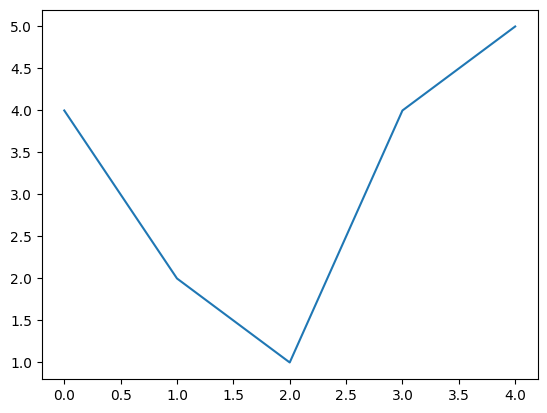

In [ ]:
import matplotlib.pyplot as plt
plt.plot([4, 2, 1, 4, 5])
plt.show()

## モランプロセスのプログラミング

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_moran(N, M0, r, s, max_steps=10000):
    """
    Moranプロセスのシミュレーション。
    N: 集団サイズ
    M0: 初期の変異細胞数
    r: 変異細胞の相対増殖率 (出生選択)
    s: 変異細胞の相対排除率 (死亡選択)
    max_steps: 最大ステップ数
    戻り値: 各ステップでの変異細胞数を要素とするNumPy配列

    Simulation of the Moran process.
    N: Population size
    M₀: Initial number of mutant cells
    r: Relative proliferation rate of mutant cells (birth selection)
    s: Relative removal rate of mutant cells (death selection)
    max_steps: Maximum number of steps
    Returns: A NumPy array whose elements are the number of mutant cells at each step.
    """
    M = M0
    history = [M]
    for step in range(1, max_steps + 1):
        W = N - M
        # 固定または消失したら残りを同じ値で埋めて終了
        # Once fixation or extinction occurs, fill the remaining entries with that same value and terminate.
        if M == 0 or M == N:
            history.extend([M] * (max_steps - step + 1))
            break
        # 複製選択確率
        # Replication selection probability
        prob_rep_mutant = (r * M) / (r * M + 1 * W)
        # 死亡選択確率
        # Death selection probability
        prob_die_mutant = (s * M) / (s * M + 1 * W)
        # 複製細胞種を乱数で決定
        # Randomly select the cell type to reproduce.
        reproduce_is_mutant = np.random.rand() < prob_rep_mutant
        # 死亡細胞種を乱数で決定
        # Randomly select the cell type to die.
        die_is_mutant = np.random.rand() < prob_die_mutant
        # 変異細胞数の更新
        # Update mutant cell count
        if reproduce_is_mutant and not die_is_mutant:
            M += 1
        elif not reproduce_is_mutant and die_is_mutant:
            M -= 1
        # それ以外は M に変化なし
        # Otherwise, M remains unchanged.
        history.append(M)
    return np.array(history)

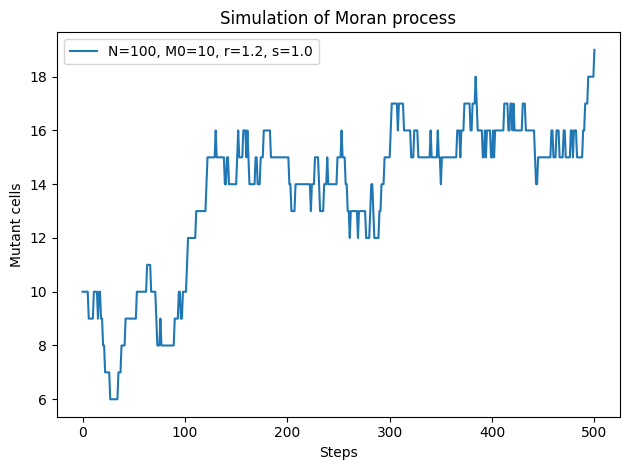

In [ ]:
# 使用例, Usage example
N = 100       # 集団サイズ, population size
M0 = 10       # 初期変異数, inital number of mutant cells
r = 1.2       # 相対増殖率, relative growth rate
s = 1.0       # 相対排除率, relative death rate
max_steps = 500

time_series = simulate_moran(N, M0, r, s, max_steps)

# プロット, plot
plt.figure()
plt.plot(time_series, label=f'N={N}, M0={M0}, r={r}, s={s}')
plt.xlabel('Steps')
plt.ylabel('Mutant cells')
plt.title('Simulation of Moran process')
plt.legend()
plt.tight_layout()
plt.show()

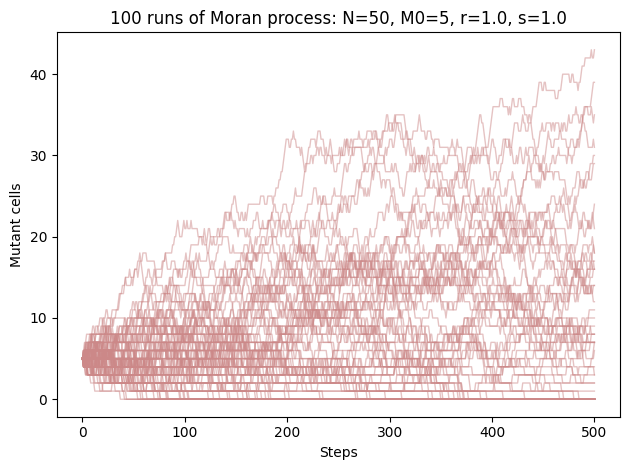

In [ ]:
# 複数試行を同じグラフに描く例, Example: plotting multiple trials on the same graph.
N = 50
M0 = 5
r = 1.0
s = 1.0
max_steps = 500

N_trials = 100

plt.figure()
for i in range(N_trials):  # N_trials回試行, N_trilas tirals
    ts = simulate_moran(N, M0, r, s, max_steps)
    plt.plot(ts, color="#cc8888", alpha=0.5, linewidth=1)
plt.xlabel('Steps')
plt.ylabel('Mutant cells')
plt.title('Simulation of Moran process')
plt.title(f'{N_trials} runs of Moran process: N={N}, M0={M0}, r={r}, s={s}')
plt.tight_layout()
plt.show()


In [5]:
# 固定確率（M=Nに到達する割合）の経験的推定
# Empirical estimation of the fixation probability (the fraction of trials that reach M = N).
def estimate_fixation_probability(N, M0, r, s, max_steps, trials=100):
    count_fixed = 0
    for _ in range(trials):
        ts = simulate_moran(N, M0, r, s, max_steps)
        if ts[min(len(ts)-1, max_steps)] == N:
            count_fixed += 1
    return count_fixed / trials

# 経験的推定と理論値の比較
# Comparison of empirical estimates and theoretical values.
N = 50
M0 = 5
r = 1.2
s = 1.0
max_steps = 5000

N_trials = 100

prob = estimate_fixation_probability(N, M0, r, s, max_steps, trials=N_trials)
print(f'fixation probability of N={N}, M0={M0}, r={r}, s={s} ({N_trials} trials) ≈ {prob:.2f}')
print(f'Theoretical fixation probability of N={N}, M0={M0}, r={r}, s={s} = {(1 - (s / r)**M0)/(1 - (s / r)**N)}')


fixation probability of N=50, M0=5, r=1.2, s=1.0 (100 trials) ≈ 0.64
Theoretical fixation probability of N=50, M0=5, r=1.2, s=1.0 = 0.5981881597812746


# レポート / Report

以下の 2 点に注⽬して、実際の細胞増殖の状況と対応させながら、細胞数の変化について考察してください。

1. 集団の総数 N と変異細胞の初期数 M0 の関係
2. 変異細胞の相対増殖率 r、変異細胞の相対排除率 s それぞれの⼤きさ

Focus on the following two points, and discuss the changes in cell numbers while relating them to actual cell proliferation conditions:
1. The relationship between total population size N and the initial number of mutated cells M0.
2. The magnitude of the mutated cells’ relative proliferation rate r and relative elimination rate s.

## ヒント / Hints

- 変異細胞の消失/固定の確率はどのように変化しますか？
- `N` と `M0`を変化させてみましょう。
- 特に、中立の場合 `r = 1`, `s = 1` はどうでしょうか。
- `r` と `s`を変化させてみましょう。
- `max_steps` が十分ではなく、シミュレーションから得られる固定確率が過小評価されているかもしれません。


- How does the probability of loss or fixation of mutant cells change?
- Try varying `N` and `M0`.
- In particular, what happens in the neutral case `r = 1`, `s = 1`?
- Try changing `r` and `s`.
- The `max_steps` may not be sufficient, so the fixation probability obtained from the simulation might be underestimated.